In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv("Algerian_forest_fires_dataset_UPDATE_CLEANED.csv")
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1.0,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2.0,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3.0,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4.0,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5.0,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [4]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [5]:
df.drop(['day', 'month', 'year'], axis = 1, inplace = True)

In [6]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [7]:
df["Classes"].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [8]:
df["Classes"] = np.where(df["Classes"].str.contains("not fire"),0,1)

In [9]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [10]:
df["Classes"].value_counts()

Classes
1    137
0    106
Name: count, dtype: int64

In [11]:
X = df.drop("FWI",axis = 1)
Y = df["FWI"]

In [12]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [13]:
Y.head()

0    0.5
1    0.4
2    0.1
3    0.0
4    0.5
Name: FWI, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.23, random_state=42)

In [15]:
# Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.659483,-0.306572,-0.314737,0.694140,0.496883,0.387493,0.628191,0.471465,0.537194,0.260602
RH,-0.659483,1.000000,0.228985,0.239121,-0.651443,-0.416586,-0.236723,-0.715473,-0.363677,-0.453090,-0.397607
Ws,-0.306572,0.228985,1.000000,0.250321,-0.192252,-0.003038,0.093646,-0.026523,0.032284,-0.084103,-0.202205
Rain,-0.314737,0.239121,0.250321,1.000000,-0.546686,-0.290551,-0.302913,-0.348777,-0.301478,-0.376281,-0.060495
FFMC,0.694140,-0.651443,-0.192252,-0.546686,1.000000,0.618155,0.519789,0.750171,0.603542,0.781614,0.257461
DMC,0.496883,-0.416586,-0.003038,-0.290551,0.618155,1.000000,0.869093,0.687483,0.983205,0.611110,0.205861
DC,0.387493,-0.236723,0.093646,-0.302913,0.519789,0.869093,1.000000,0.515683,0.942660,0.536699,-0.067582
ISI,0.628191,-0.715473,-0.026523,-0.348777,0.750171,0.687483,0.515683,1.000000,0.645517,0.740540,0.293176
BUI,0.471465,-0.363677,0.032284,-0.301478,0.603542,0.983205,0.942660,0.645517,1.000000,0.605102,0.107739
Classes,0.537194,-0.453090,-0.084103,-0.376281,0.781614,0.611110,0.536699,0.740540,0.605102,1.000000,0.197333


<Axes: >

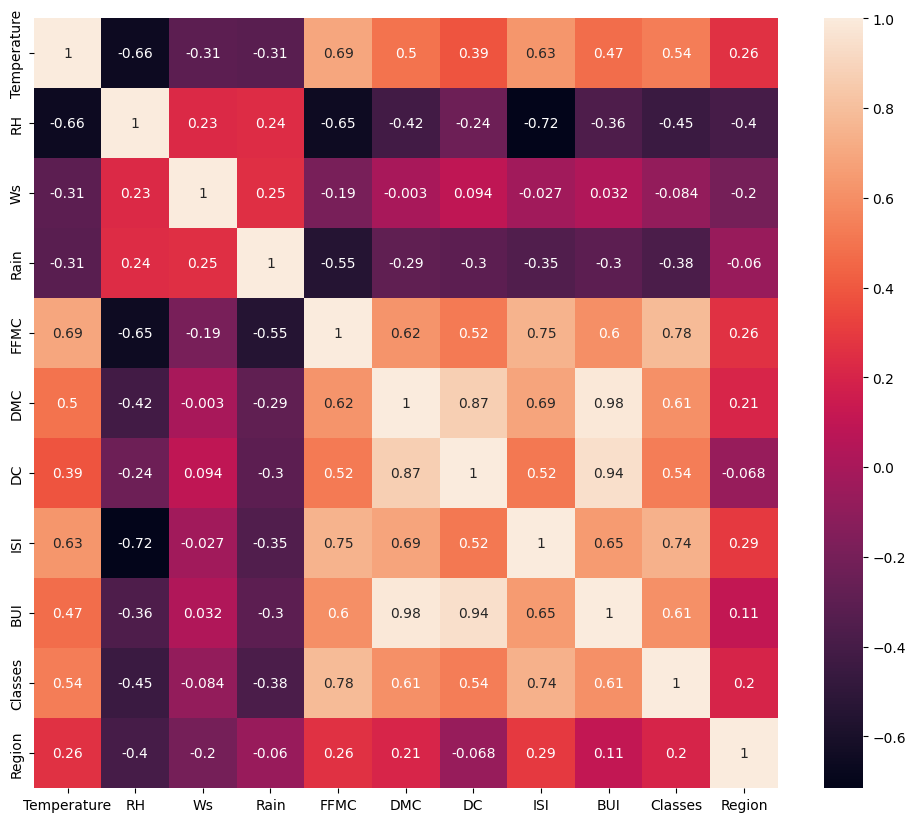

In [16]:
# Check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr, annot = True)

### Writing a **function** to delete all the column which have a **correlation** on `greater than a threshold` since we can use the **other variable to do the same job**

In [17]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [18]:
corr_features = correlation(X_train,0.85)
print(corr_features)

{'BUI', 'DC'}


In [19]:
X_train.drop(corr_features, axis = 1, inplace = True)
X_test.drop(corr_features, axis = 1, inplace = True)

In [20]:
X_train.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,ISI,Classes,Region
162,34,56,15,2.9,74.8,7.1,1.6,0,1
178,33,57,16,0.0,87.5,15.7,6.7,1,1
224,31,72,14,0.0,84.2,8.3,3.8,1,1
230,36,33,13,0.1,90.6,25.8,9.0,1,1
154,34,56,17,0.1,84.7,9.7,4.7,1,1


### `Feature Scaling` and `Standardization`

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'X_train After Scaling')

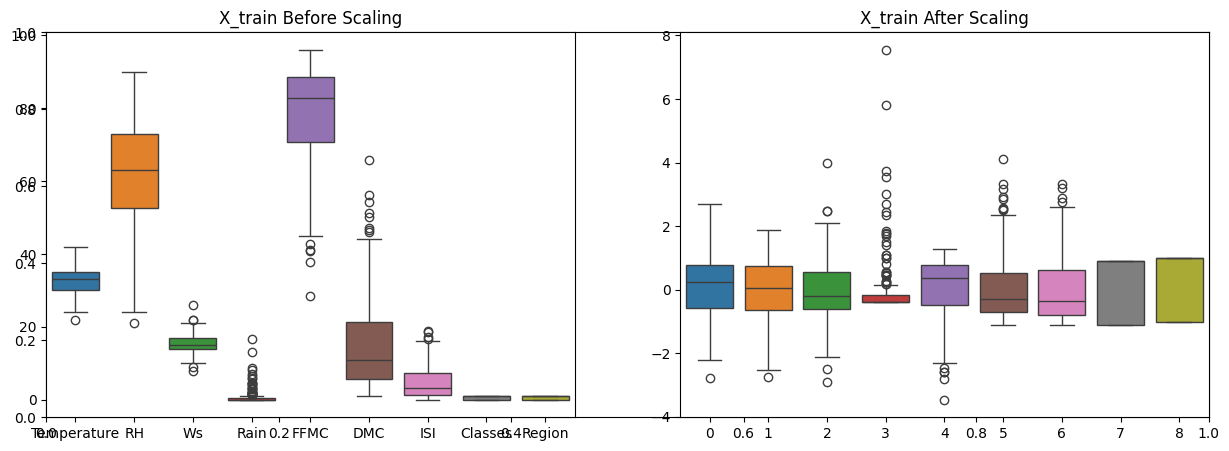

In [22]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## `Linear Regression Model`

In [23]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

regression = LinearRegression()
regression.fit(X_train_scaled,Y_train)
Y_pred = regression.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
score = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")

Mean Squared Error: 0.7275050957513086
Root Mean Squared Error: 0.8529390926386882
Mean Absolute Error: 0.5759699915797649
Score: 0.9841721098920352


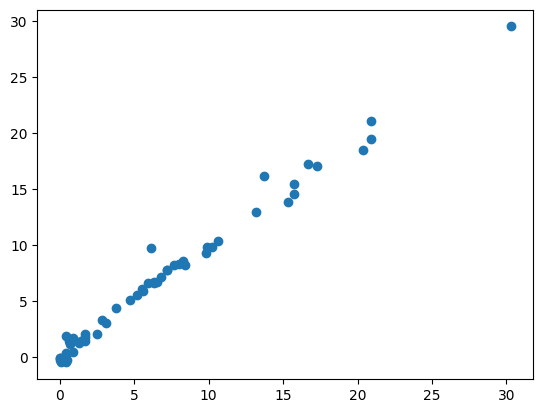

In [24]:
plt.scatter(Y_test, Y_pred);

## `Lasso Regression`

In [26]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

lasso = Lasso()
lasso.fit(X_train_scaled,Y_train)
Y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
score = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")

Mean Squared Error: 2.334169349890997
Root Mean Squared Error: 1.527798857798695
Mean Absolute Error: 1.1464136719261415
Score: 0.9492168835940586


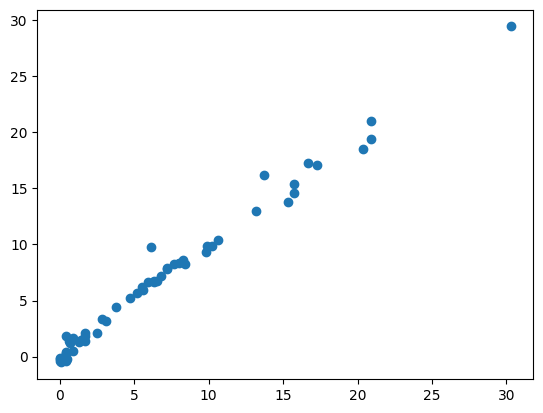

In [28]:
plt.scatter(Y_test, Y_pred);

### `Cross Validation Lasso` -> Used For `Hyperparameter Tuning`

In [35]:
from sklearn.linear_model import LassoCV
lassoCV = LassoCV(cv = 5)
lassoCV.fit(X_train_scaled,Y_train)
Y_pred_lassoCV = lassoCV.predict(X_test_scaled)
print(Y_pred_lassoCV)

[ 8.17695026  7.68506384 -0.25424098  4.73398518  6.79618765  1.78171148
  2.2383429   7.65003278  1.98967557  3.39851501  0.62549914  9.96909528
  9.37172436 16.99767168 18.29031088  1.62233266  1.63049923 -0.65198145
  7.28687335  3.11685706  1.95431263  0.17522522  6.47703164  0.13766156
 21.00918084  5.12594531  5.86324373  9.76184075 -0.78198996  9.928179
  6.72398449 -0.31470658 10.31373689 14.44094333  1.70903893  0.83994585
  2.03333267  5.9835752  -0.62704329 -0.56302444  6.47360211  2.0791102
  8.46989719 -0.85669556 15.41644224  8.33153906  8.49732874  1.43669177
 13.03872401  1.20563742 29.1032319   5.50591528 17.17104307 19.29496799
 13.71456346 16.05895554]


In [38]:
lassoCV.alphas_ # The alphas that the model tried = 100 (almost)

array([7.00791252, 6.53560267, 6.09512492, 5.6843339 , 5.30122882,
       4.94394374, 4.61073848, 4.29999014, 4.01018519, 3.73991213,
       3.48785457, 3.25278485, 3.03355804, 2.82910638, 2.63843408,
       2.46061245, 2.29477541, 2.14011522, 1.99587862, 1.86136308,
       1.73591344, 1.61891868, 1.50980898, 1.40805291, 1.31315486,
       1.22465261, 1.14211513, 1.06514039, 0.99335349, 0.92640479,
       0.86396821, 0.80573964, 0.75143549, 0.70079125, 0.65356027,
       0.60951249, 0.56843339, 0.53012288, 0.49439437, 0.46107385,
       0.42999901, 0.40101852, 0.37399121, 0.34878546, 0.32527848,
       0.3033558 , 0.28291064, 0.26384341, 0.24606125, 0.22947754,
       0.21401152, 0.19958786, 0.18613631, 0.17359134, 0.16189187,
       0.1509809 , 0.14080529, 0.13131549, 0.12246526, 0.11421151,
       0.10651404, 0.09933535, 0.09264048, 0.08639682, 0.08057396,
       0.07514355, 0.07007913, 0.06535603, 0.06095125, 0.05684334,
       0.05301229, 0.04943944, 0.04610738, 0.0429999 , 0.04010

In [39]:
lassoCV.alpha_ # The alpha which was finally used

np.float64(0.056843339022754326)

In [40]:
lassoCV.mse_path_ # 5 folds * 100 alphas each = 500 mses (almost)

array([[46.54543025, 66.76985292, 56.80000189, 75.52834495, 38.6699823 ],
       [41.3380455 , 62.91878807, 52.18002353, 73.32588387, 34.71696436],
       [36.28332782, 56.22376489, 44.96300624, 66.09048398, 31.26732122],
       [31.87307357, 49.61023805, 38.77555136, 59.73548826, 28.25626352],
       [28.02411991, 43.82577366, 33.47757616, 54.15040272, 24.74175742],
       [24.6644782 , 38.76441434, 28.94749147, 48.66489586, 21.40584412],
       [21.73111157, 34.3338362 , 25.08016719, 42.86143672, 18.52094521],
       [19.16926027, 30.45415264, 21.78431734, 37.79684401, 16.02814852],
       [16.93124567, 27.05520234, 18.9807982 , 33.37695649, 13.8748787 ],
       [14.9754122 , 24.07602717, 16.60149562, 29.51830059, 12.01591169],
       [13.26590193, 21.46349716, 14.58705596, 26.14874971, 10.41198168],
       [11.77107002, 19.17111538, 12.88625151, 23.20550653,  9.0290001 ],
       [10.46349262, 17.1588957 , 11.45477674, 20.63389189,  7.83705355],
       [ 9.31928168, 15.39141519, 10.2

Mean Squared Error: 0.8476887180782722
Root Mean Squared Error: 0.920700123861332
Mean Absolute Error: 0.6528798577089784
Score: 0.9815573472215362


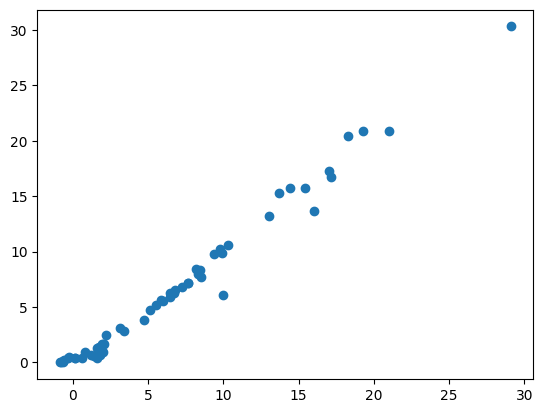

In [41]:
plt.scatter(Y_pred_lassoCV,Y_test)
mse = mean_squared_error(Y_test, Y_pred_lassoCV)
mae = mean_absolute_error(Y_test, Y_pred_lassoCV)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred_lassoCV))
score = r2_score(Y_test, Y_pred_lassoCV)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")

## `Ridge Regression`

In [27]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

ridge = Ridge()
ridge.fit(X_train_scaled,Y_train)
Y_pred = ridge.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
score = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")

Mean Squared Error: 0.750544650374967
Root Mean Squared Error: 0.8663398007565893
Mean Absolute Error: 0.5962439517488163
Score: 0.9836708521814715


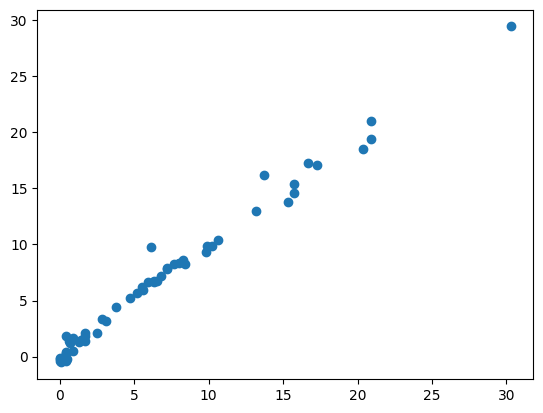

In [29]:
plt.scatter(Y_test, Y_pred);

Mean absolute error 0.5962439517488163
R2 Score 0.9836708521814715


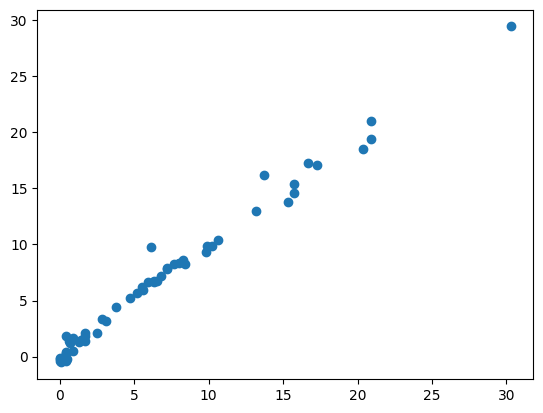

In [43]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(X_train_scaled,Y_train)
y_pred=ridgecv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [44]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_results': None,
 'store_cv_values': 'deprecated'}

## `ElasticNet Regression`

In [31]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import r2_score

elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled,Y_train)
Y_pred = elasticNet.predict(X_test_scaled)

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
score = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"Mean Absolute Error: {mae}")
print(f"Score: {score}")

Mean Squared Error: 5.634156214358646
Root Mean Squared Error: 2.3736377597179072
Mean Absolute Error: 1.8731479970853953
Score: 0.8774210573468482


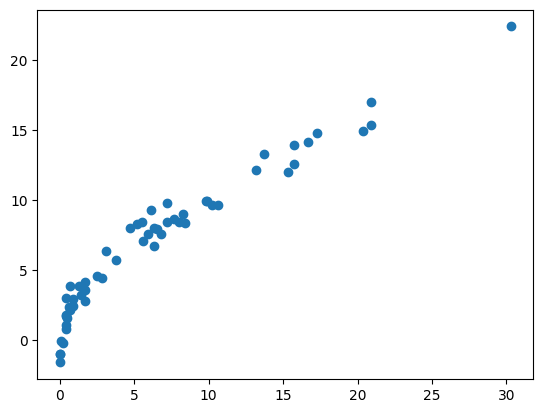

In [32]:
plt.scatter(Y_test, Y_pred);

Mean absolute error 0.6829342750565522
R2 Score 0.9810601594164137


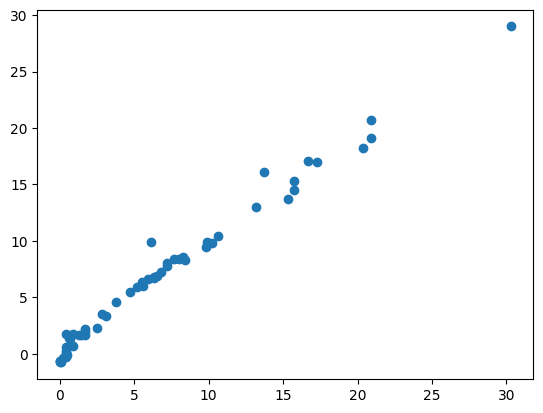

In [45]:
from sklearn.linear_model import ElasticNetCV
elasticcv=ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled,Y_train)
y_pred=elasticcv.predict(X_test_scaled)
plt.scatter(Y_test,y_pred)
mae=mean_absolute_error(Y_test,y_pred)
score=r2_score(Y_test,y_pred)
print("Mean absolute error", mae)
print("R2 Score", score)

In [47]:
elasticcv.get_params()

{'alphas': None,
 'copy_X': True,
 'cv': 5,
 'eps': 0.001,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 1000,
 'n_alphas': 100,
 'n_jobs': None,
 'positive': False,
 'precompute': 'auto',
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.0001,
 'verbose': 0}